<center><h1>Wine Quality Prediction</h1></center>
    <img src = "https://raw.githubusercontent.com/Masterx-AI/Project_Wine_Quality_Investigation/main/wq.jpg">
    

Table of contents:

1. [Import relevant libraries](#Libraries)
2. [Load files](#Load)
3. [Data Exploration](#Exploration)
4. [EDA(Exploratory Data Analysis)](#EDA)
5. [Preprocessing Data](#Cleaning)
6. [Correlations & Distributions ](#Correlations)
7. [Splitting the Data](#Splitting)
8. [Model training](#Model)
9. [Test set predictions](#Predictions)

<a name = "Libraries"></a>
## 1. Import relevant libraries

In [1]:
# Install xgboost
# !pip install xgboost
# !pip install imbalanced-learn

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns 
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from scipy import stats
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder,MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay ,accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import plot_importance
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

<a name = "Load"></a>
## 2. Load files

In [3]:
#Loading dataset
df = pd.read_csv('winequalityN.csv')
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.000000,7.216579,1.296750,3.800000,6.400000,7.000000,7.700000,15.900000
volatile acidity,6489.000000,0.339691,0.164649,0.080000,0.230000,0.290000,0.400000,1.580000
citric acid,6494.000000,0.318722,0.145265,0.000000,0.250000,0.310000,0.390000,1.660000
residual sugar,6495.000000,5.444326,4.758125,0.600000,1.800000,3.000000,8.100000,65.800000
chlorides,6495.000000,0.056042,0.035036,0.009000,0.038000,0.047000,0.065000,0.611000
free sulfur dioxide,6497.000000,30.525319,17.749400,1.000000,17.000000,29.000000,41.000000,289.000000
total sulfur dioxide,6497.000000,115.744574,56.521855,6.000000,77.000000,118.000000,156.000000,440.000000
density,6497.000000,0.994697,0.002999,0.987110,0.992340,0.994890,0.996990,1.038980
pH,6488.000000,3.218395,0.160748,2.720000,3.110000,3.210000,3.320000,4.010000
sulphates,6493.000000,0.531215,0.148814,0.220000,0.430000,0.510000,0.600000,2.000000


In [4]:
data = pd.DataFrame(df)

<a name = "Exploration"></a>
## 3. Data Exploration

In [5]:
#Checking the data distribution
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Handeling Duplications 

In [7]:
data.duplicated().value_counts()

False    5329
True     1168
dtype: int64

In [8]:
# Removing duplications
duplicated_mask = data.duplicated()
data = data[~duplicated_mask]

In [9]:
data.duplicated().any()

False

In [10]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<a name = "EDA"></a>
## 4. EDA(Exploratory Data Analysis)


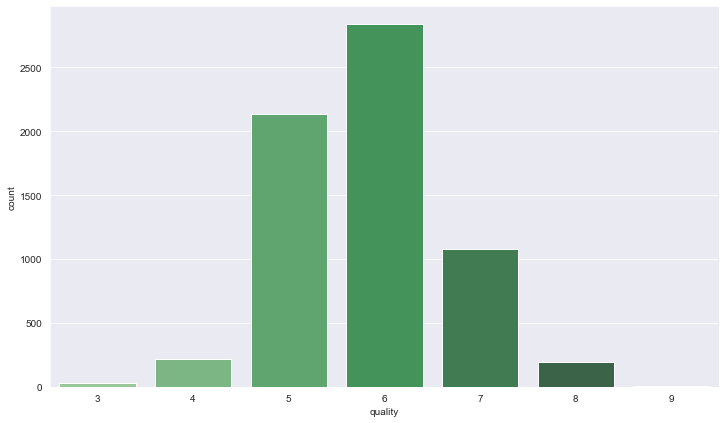

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(x='quality',data=df,palette='Greens_d')
plt.show()

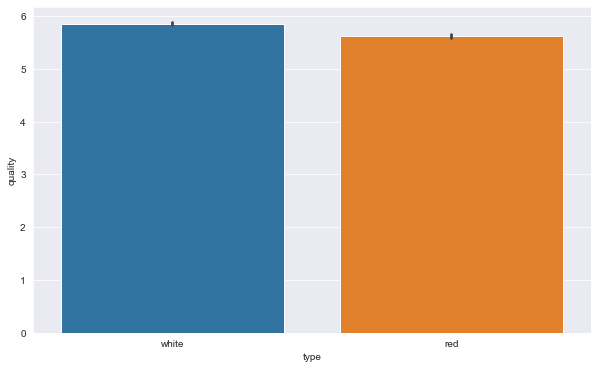

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'type', y = 'quality', data = data)
plt.show()

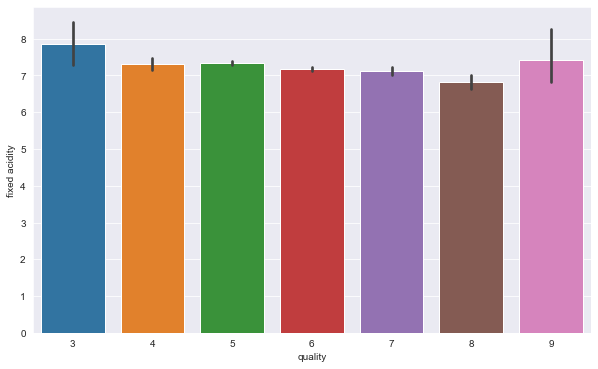

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)
plt.show()

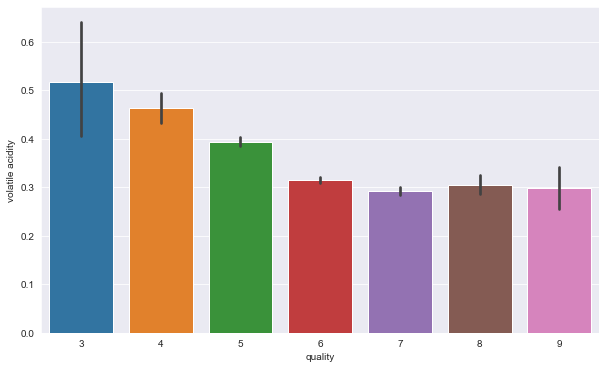

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)
plt.show()

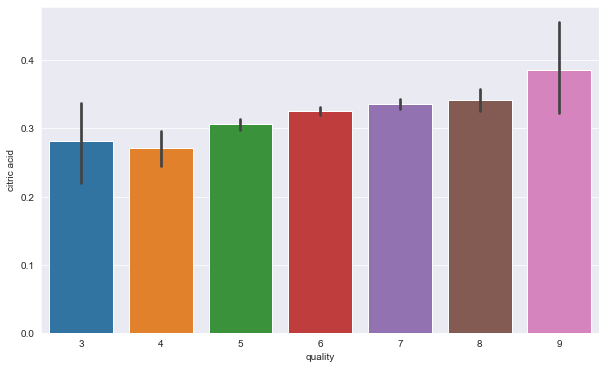

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)
plt.show()

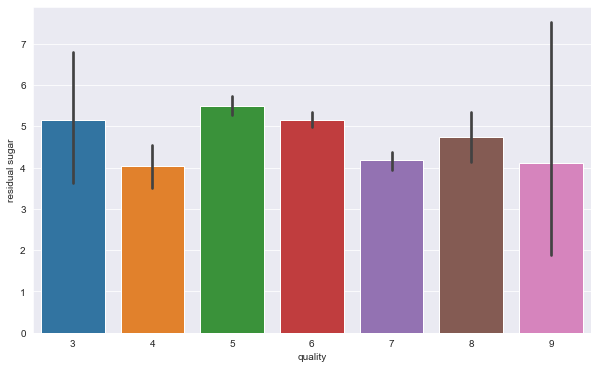

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)
plt.show()

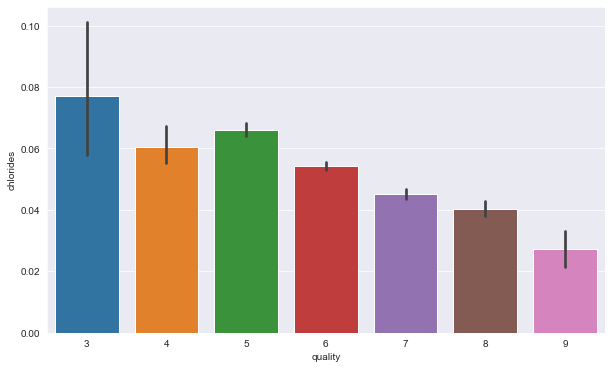

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)
plt.show()

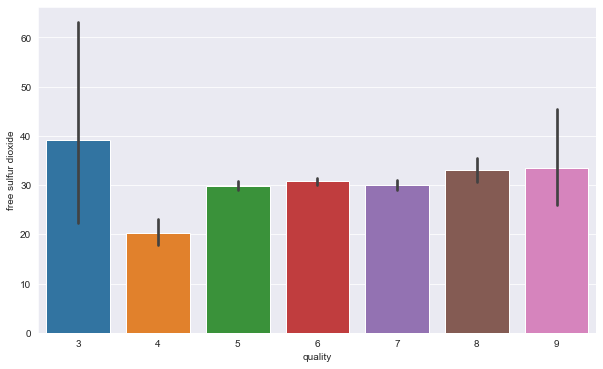

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)
plt.show()

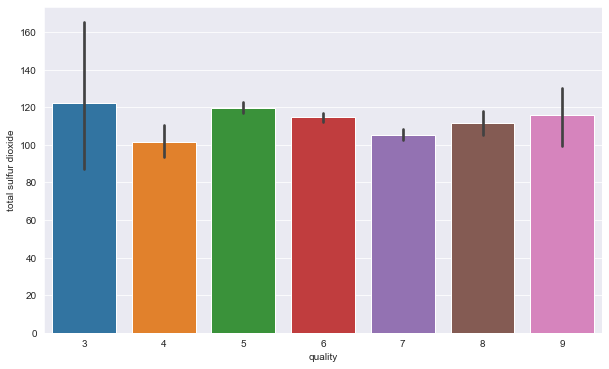

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data)
plt.show()

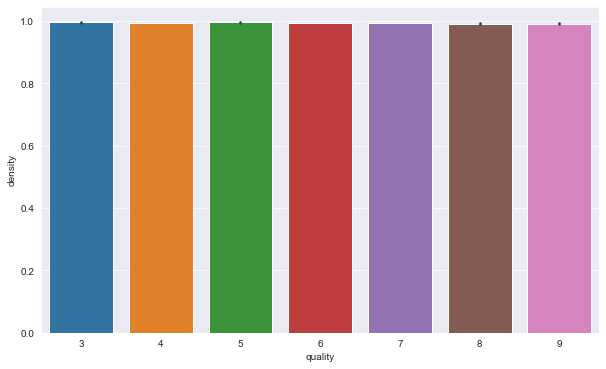

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = data)
plt.show()

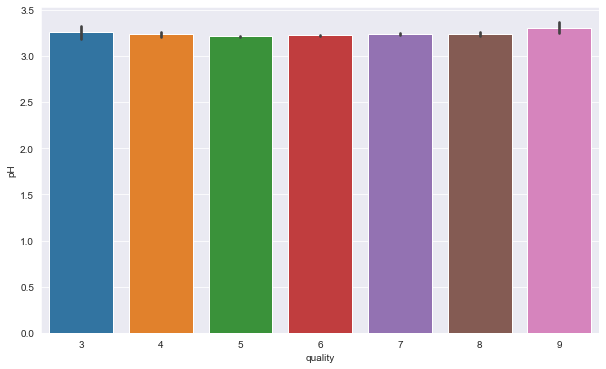

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = data)
plt.show()

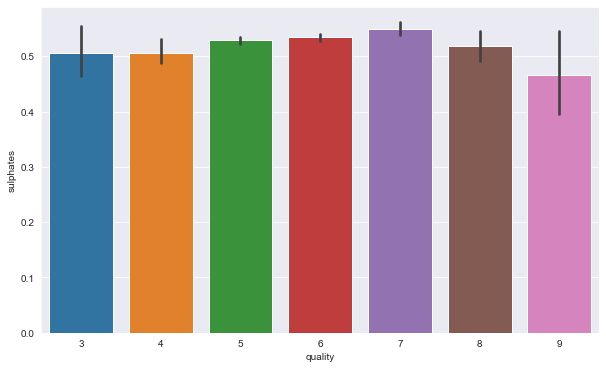

In [22]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)
plt.show()

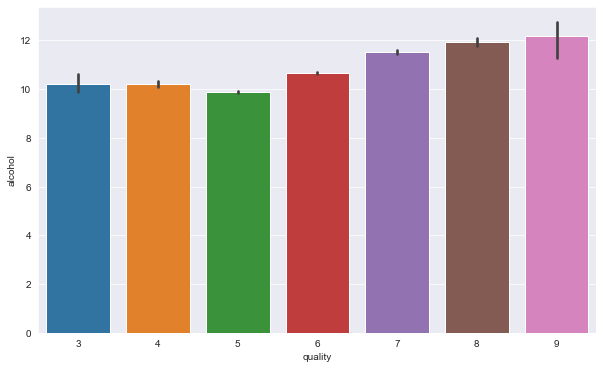

In [23]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = data)
plt.show()

<a name = "Cleaning"></a>
## 5. Preprocessing Data

### Handeling Categorical Attributes

The "type" variable is categorical so let's convert it to a numerical variable.

In [24]:
print("Quality Points:",df['quality'].unique())

Quality Points: [6 5 7 8 4 3 9]


In [25]:
data['type'].value_counts()

white    3970
red      1359
Name: type, dtype: int64

In [26]:
# Converting the "type" variable to a numeric variable(white to 1 & red to 0)
ordinal_encoder = OrdinalEncoder()
type_c = data['type'].to_numpy()
type_c = type_c.reshape(-1,1)
type_encoded = ordinal_encoder.fit_transform(type_c)
type_encoded = type_encoded.ravel()
data['type']= pd.Series(type_encoded) 

In [27]:
data['type'].value_counts()

1.0    3223
0.0    1123
Name: type, dtype: int64

Now let's use Label Encoding for the "quality" column .But before that we need to do something because the "quality" target variable is not binary .

In [28]:
data['quality'].value_counts()

6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: quality, dtype: int64

In [29]:
bins = (2, 6, 9)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [30]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,bad
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,bad
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,bad
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad
6,1.0,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,bad


Using pd.cut() we divided the "quality" column to 2 categories good and bad using bins between 2-6 for bad and 6-9 for good. 

Now we can use Label Encoding .

In [31]:
label_quality = LabelEncoder()

In [32]:
data['quality'] = label_quality.fit_transform(data['quality'])

In [33]:
print("Quality Points:",df['quality'].unique())

Quality Points: [6 5 7 8 4 3 9]


In [34]:
data['quality'].value_counts()

0    4318
1    1011
Name: quality, dtype: int64

In [35]:
data['quality'].head()

0    0
1    0
2    0
3    0
6    0
Name: quality, dtype: int32

In [36]:
data.columns.values

array(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

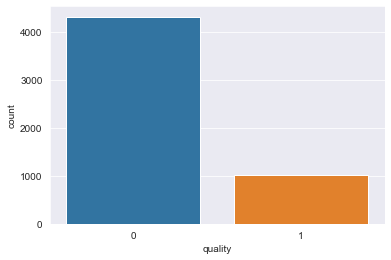

In [37]:
sns.countplot(data['quality'])
plt.show()

### Handeling missing data 

In [38]:
#Information about the data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4346 non-null   float64
 1   fixed acidity         5319 non-null   float64
 2   volatile acidity      5321 non-null   float64
 3   citric acid           5326 non-null   float64
 4   residual sugar        5327 non-null   float64
 5   chlorides             5327 non-null   float64
 6   free sulfur dioxide   5329 non-null   float64
 7   total sulfur dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5320 non-null   float64
 10  sulphates             5325 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int32  
dtypes: float64(12), int32(1)
memory usage: 562.0 KB


In [39]:
data.shape

(5329, 13)

In [40]:
data.isnull().sum()

type                    983
fixed acidity            10
volatile acidity          8
citric acid               3
residual sugar            2
chlorides                 2
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        9
sulphates                 4
alcohol                   0
quality                   0
dtype: int64

In [41]:
data["pH"].value_counts()

3.16    156
3.22    154
3.14    146
3.15    144
3.20    142
       ... 
2.72      1
3.85      1
3.82      1
3.81      1
3.79      1
Name: pH, Length: 108, dtype: int64

In [42]:
data["sulphates"].value_counts()

0.50    212
0.46    196
0.54    193
0.44    184
0.48    170
       ... 
1.95      1
1.12      1
1.20      1
1.56      1
1.33      1
Name: sulphates, Length: 111, dtype: int64

There are some missing values from those columns :"fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","pH" and "sulphates" .Let's replace the missing values with their mean using simple imputer .

In [43]:
imputer = SimpleImputer(strategy="mean")  
imputer.fit(data)

SimpleImputer()

In [44]:
imputer.statistics_

array([7.41601473e-01, 7.21657266e+00, 3.44123285e-01, 3.18738265e-01,
       5.05383893e+00, 5.66682936e-02, 3.00601426e+01, 1.14189341e+02,
       9.94535881e-01, 3.22443421e+00, 5.33267606e-01, 1.05485388e+01,
       1.89716645e-01])

In [45]:
columns = data.columns
X= imputer.transform(data)
data=pd.DataFrame(X, columns =columns)

In [46]:
data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [47]:
data.columns.values

array(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

<a name = "Correlations"></a>
## 6.Correlations & Distributions 

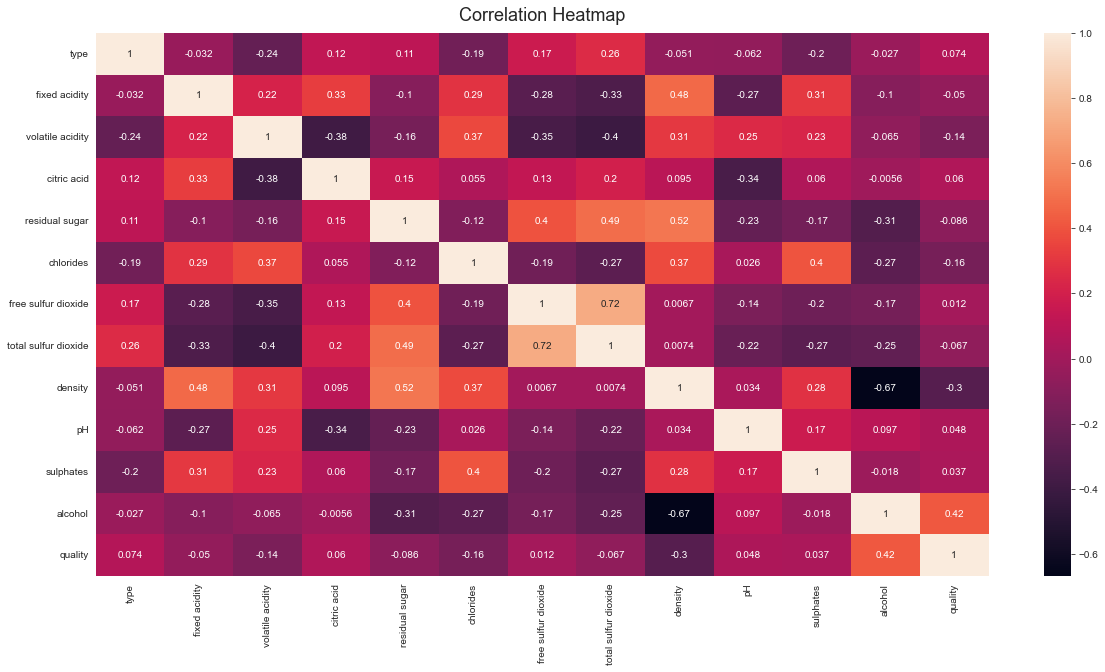

In [48]:
# Visualizing the collelations between all variables of the data.
plt.figure(1 , figsize = (20,10))
cor = sns.heatmap(data.corr(), annot = True)
cor.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

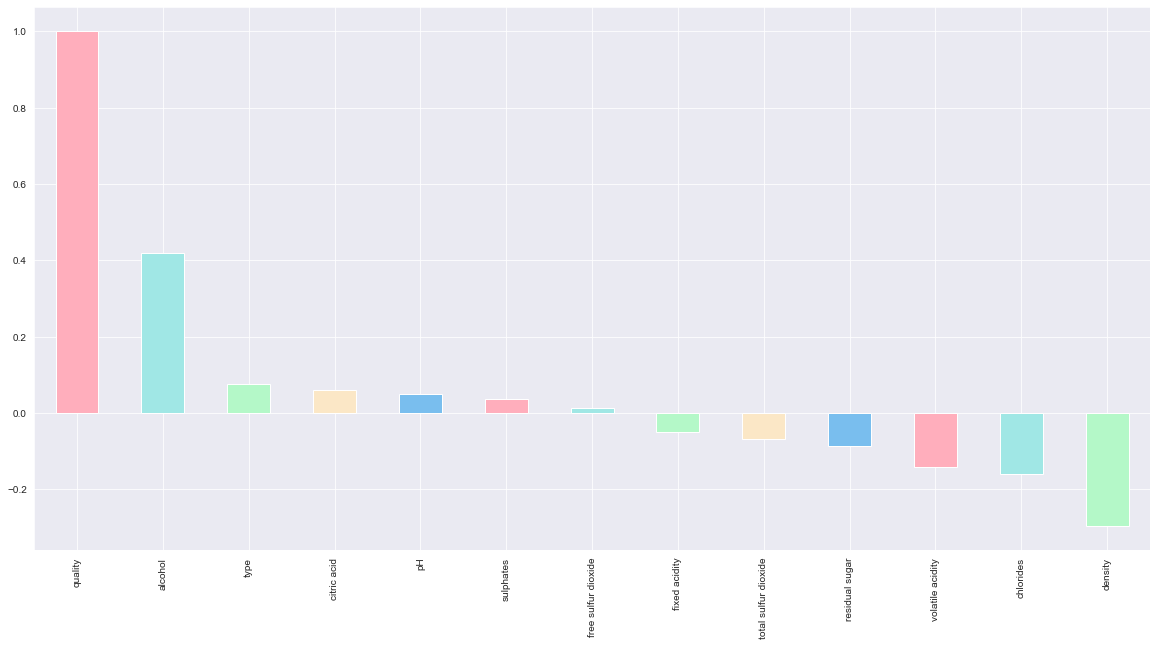

In [49]:
plt.figure(1 , figsize = (20,10))
data.corr()['quality'].sort_values(ascending = False).plot(kind='bar', color=['#FFAEBC','#A0E7E5', '#B4F8C8', '#FBE7C6', '#79BEEE'])
plt.show()

### Scatter Matrix 

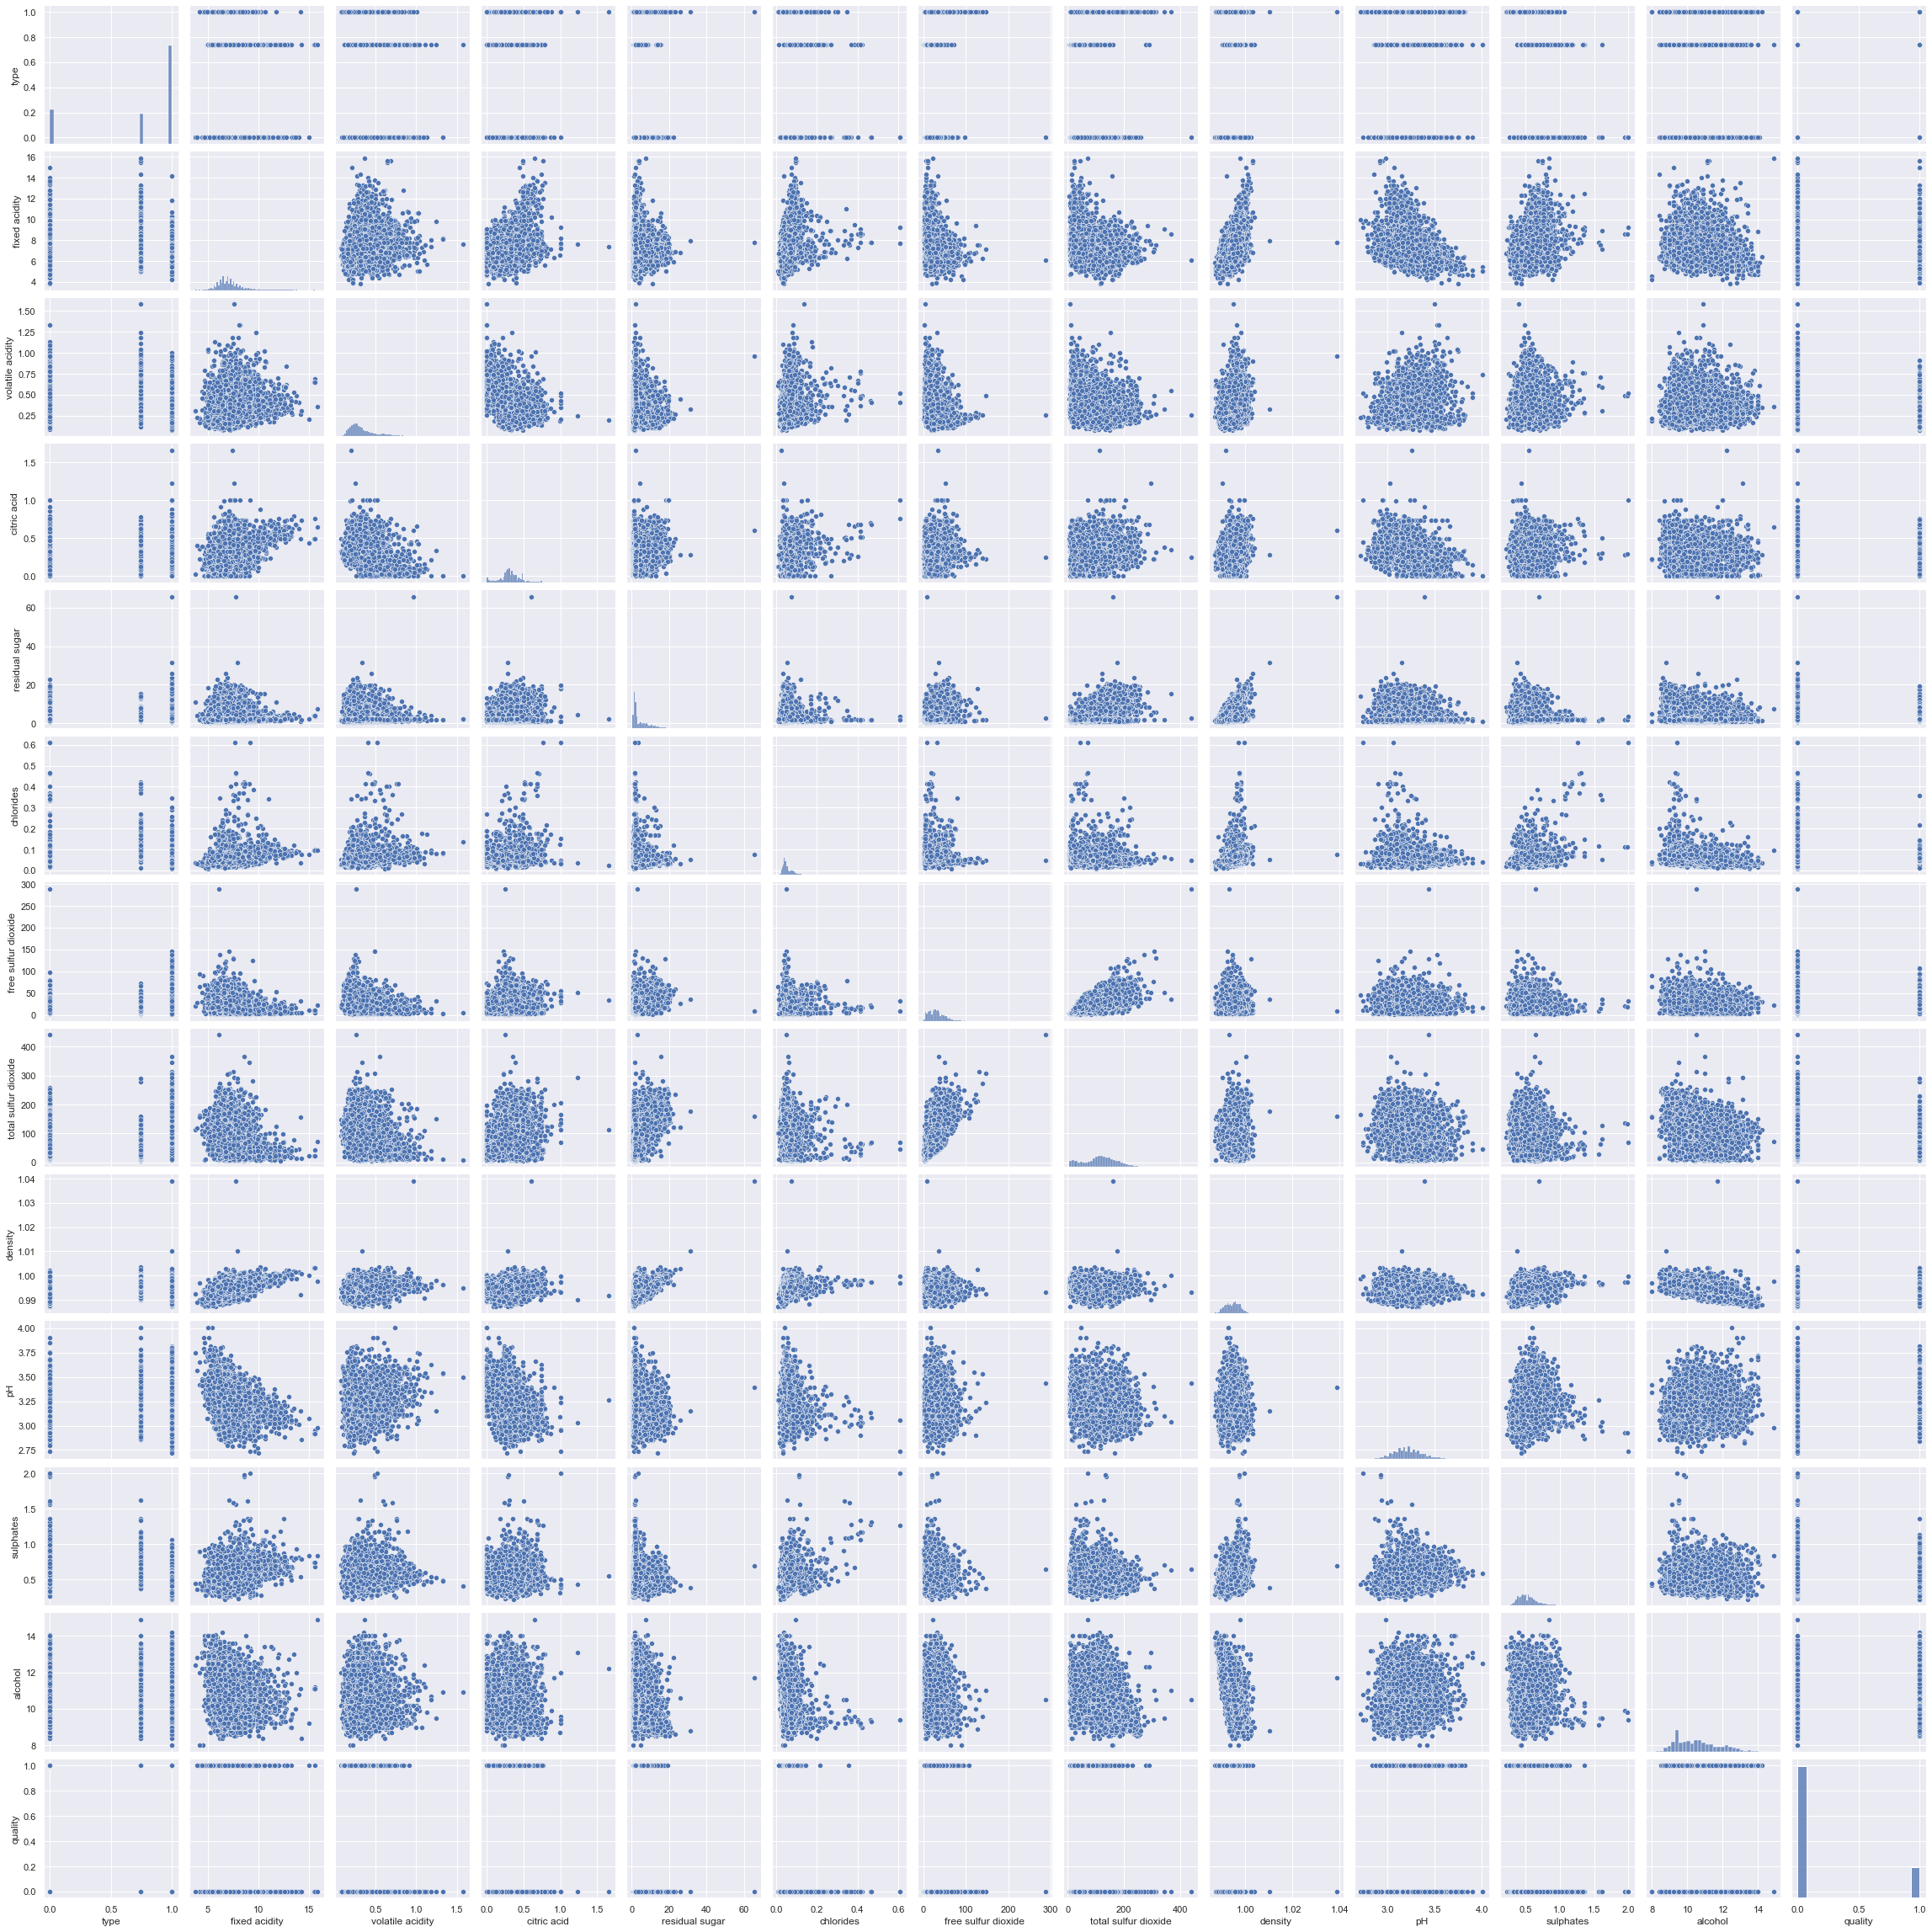

In [50]:
sns.set()
sns.pairplot(data)
plt.figure(1 , figsize = (20,10))
plt.show()

In [51]:
x = data[['type','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = data[['quality']]

### Features Distributions & Normalization

Now I'm gonna normalize our features using Box-Cox Transformation and see the difference between the distributions.

##### Fixed Acidity

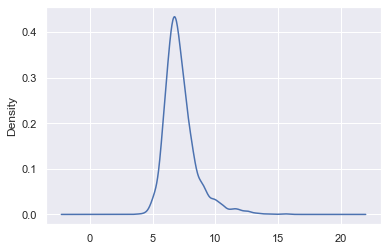

In [52]:
x['fixed acidity'].plot(kind='kde')
plt.show()

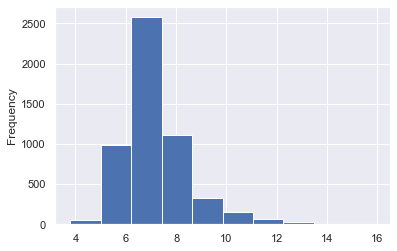

In [53]:
x['fixed acidity'].plot(kind='hist')
plt.show()

In [54]:
x['fixed acidity'], _ = pd.Series(stats.boxcox(x['fixed acidity']))


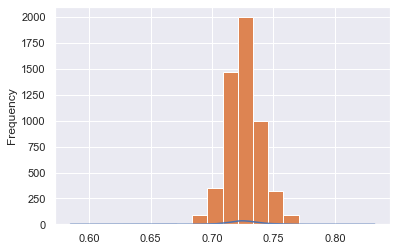

In [55]:
x['fixed acidity'].plot(kind='kde')
x['fixed acidity'].plot(kind='hist')
plt.show()

##### Volatile Acidity

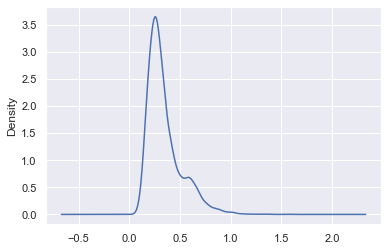

In [56]:
x['volatile acidity'].plot(kind='kde')
plt.show()

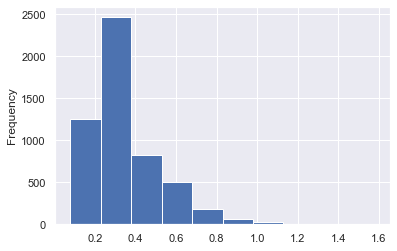

In [57]:
x['volatile acidity'].plot(kind='hist')
plt.show()

In [58]:
x['volatile acidity'], _ = pd.Series(stats.boxcox(x['volatile acidity']))

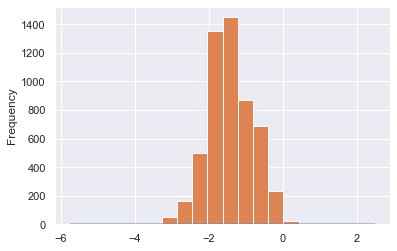

In [59]:
x['volatile acidity'].plot(kind='kde')
x['volatile acidity'].plot(kind='hist')
plt.show()

##### Citric Acid

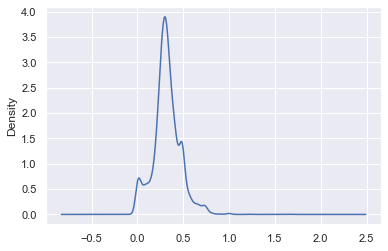

In [60]:
x['citric acid'].plot(kind='kde')
plt.show()

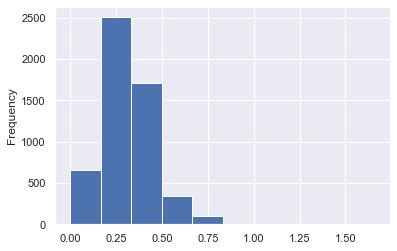

In [61]:
x['citric acid'].plot(kind='hist')
plt.show()

In [62]:
x['citric acid']=x['citric acid']+1

In [63]:
x['citric acid'], _ = pd.Series(stats.boxcox(x['citric acid']))

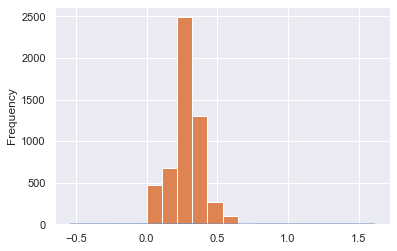

In [64]:
x['citric acid'].plot(kind='kde')
x['citric acid'].plot(kind='hist')
plt.show()

##### Residual Sugar

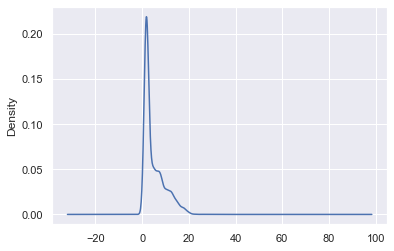

In [65]:
x['residual sugar'].plot(kind='kde')
plt.show()

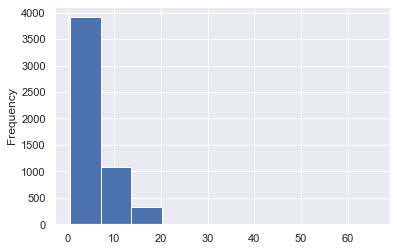

In [66]:
x['residual sugar'].plot(kind='hist')
plt.show()

In [67]:
x['residual sugar'], _ = pd.Series(stats.boxcox(x['residual sugar']))

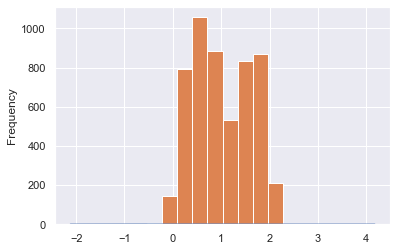

In [68]:
x['residual sugar'].plot(kind='kde')
x['residual sugar'].plot(kind='hist')
plt.show()

##### Chlorides

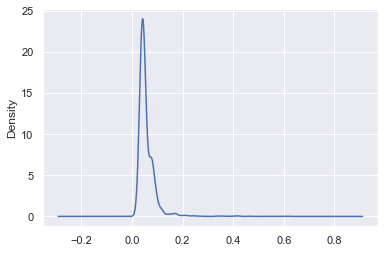

In [69]:
x['chlorides'].plot(kind='kde')
plt.show()

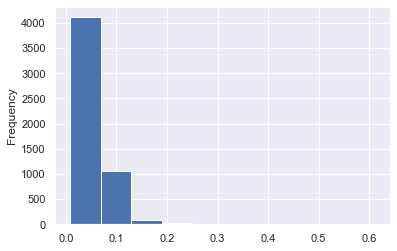

In [70]:
x['chlorides'].plot(kind='hist')
plt.show()

In [71]:
x['chlorides'], _ = pd.Series(stats.boxcox(x['chlorides']))

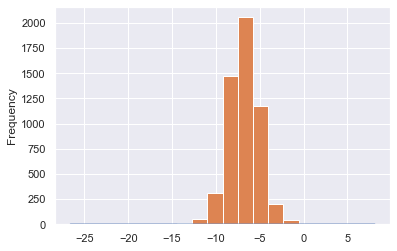

In [72]:
x['chlorides'].plot(kind='kde')
x['chlorides'].plot(kind='hist')
plt.show()

##### Free Sulfur Dioxide

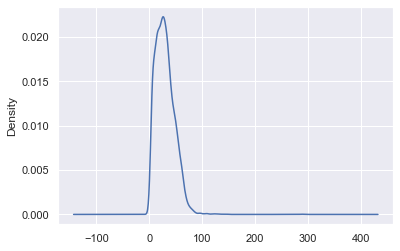

In [73]:
x['free sulfur dioxide'].plot(kind='kde')
plt.show()

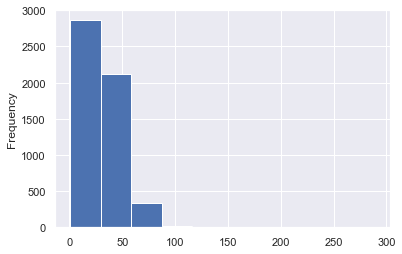

In [74]:
x['free sulfur dioxide'].plot(kind='hist')
plt.show()

In [75]:
x['free sulfur dioxide'], _ = pd.Series(stats.boxcox(x['free sulfur dioxide']))

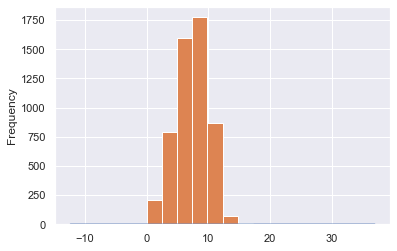

In [76]:
x['free sulfur dioxide'].plot(kind='kde')
x['free sulfur dioxide'].plot(kind='hist')
plt.show()

##### Total Sulfur Dioxide

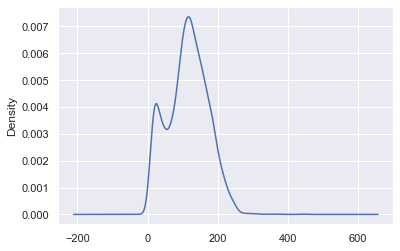

In [77]:
x['total sulfur dioxide'].plot(kind='kde')
plt.show()

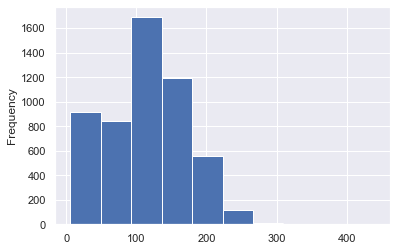

In [78]:
x['total sulfur dioxide'].plot(kind='hist')
plt.show()

In [79]:
x['total sulfur dioxide'], _ = pd.Series(stats.boxcox(x['total sulfur dioxide']))

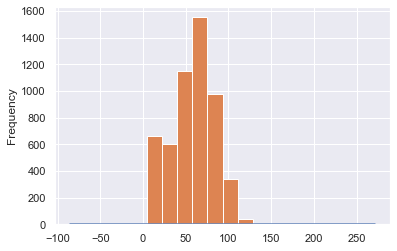

In [80]:
x['total sulfur dioxide'].plot(kind='kde')
x['total sulfur dioxide'].plot(kind='hist')
plt.show()

##### Density

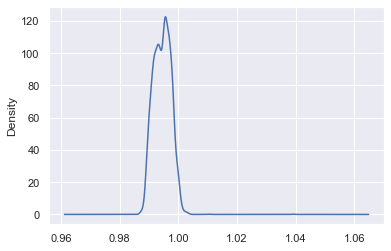

In [81]:
x['density'].plot(kind='kde')
plt.show()

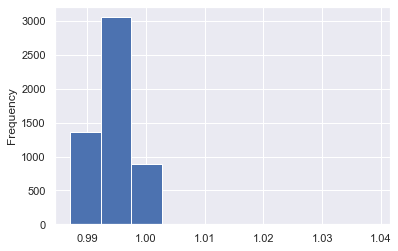

In [82]:
x['density'].plot(kind='hist')
plt.show()

In [83]:
x['density'], _ = pd.Series(stats.boxcox(x['density']))

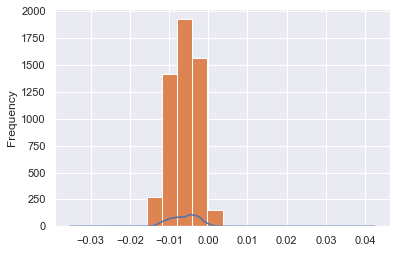

In [84]:
x['density'].plot(kind='kde')
x['density'].plot(kind='hist')
plt.show()

##### PH

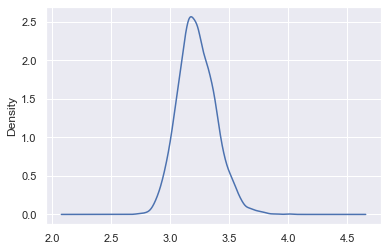

In [85]:
x['pH'].plot(kind='kde')
plt.show()

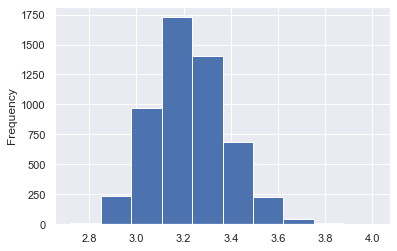

In [86]:
x['pH'].plot(kind='hist')
plt.show()

In [87]:
x['pH'], _ = pd.Series(stats.boxcox(x['pH']))

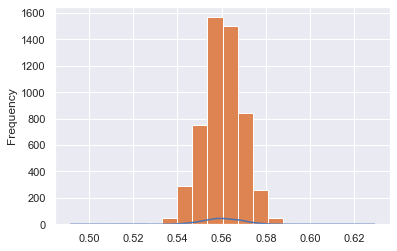

In [88]:
x['pH'].plot(kind='kde')
x['pH'].plot(kind='hist')
plt.show()

##### Sulphates

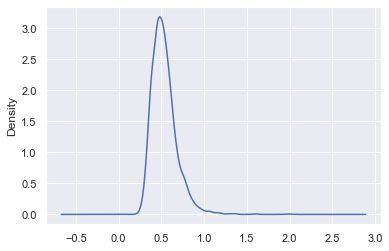

In [89]:
x['sulphates'].plot(kind='kde')
plt.show()

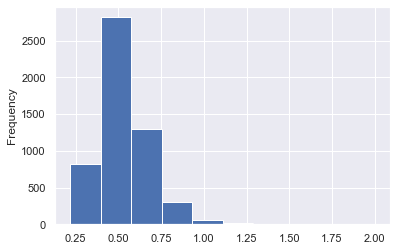

In [90]:
x['sulphates'].plot(kind='hist')
plt.show()

In [91]:
x['sulphates'], _ = pd.Series(stats.boxcox(x['sulphates']))

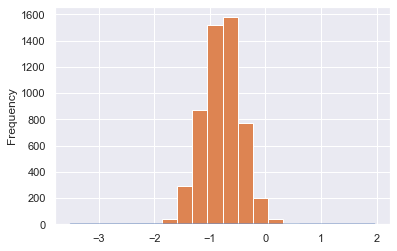

In [92]:
x['sulphates'].plot(kind='kde')
x['sulphates'].plot(kind='hist')
plt.show()

##### Alcohol

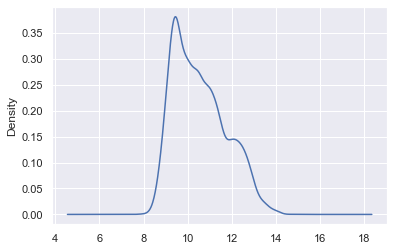

In [93]:
x['alcohol'].plot(kind='kde')
plt.show()

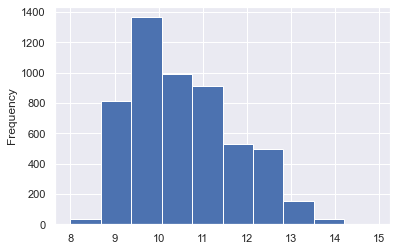

In [94]:
x['alcohol'].plot(kind='hist')
plt.show()

In [95]:
x['alcohol'], _ = pd.Series(stats.boxcox(x['alcohol']))

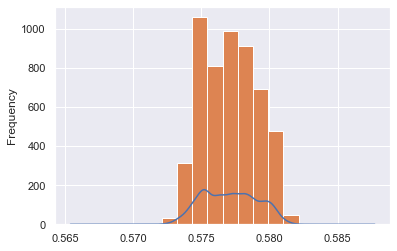

In [96]:
x['alcohol'].plot(kind='kde')
x['alcohol'].plot(kind='hist')
plt.show()

### Handeling Unbalanced data

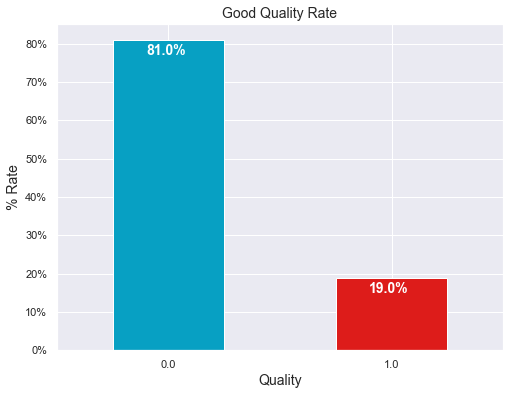

In [97]:
def quality_rate(y):
    colors = ['#07a0c3', '#DD1C1A']
    ax = (y.value_counts(normalize=True)*100).plot(kind='bar',stacked = True,rot = 0,color = colors,figsize = (8,6))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('% Rate',size = 14)
    ax.set_xlabel('Quality',size = 14)
    ax.set_title('Good Quality Rate', size = 14)

    for i in ax.patches:
        ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()), 1))+'%',
            color='white',
            weight = 'bold',
            size = 14)
quality_rate(y['quality'])

We can see that the data is unbalanced so let's try SMOTE stands for Synthetic Minority Oversampling Technique.


In [98]:
smote = SMOTE()
x, y= smote.fit_resample(x, y)

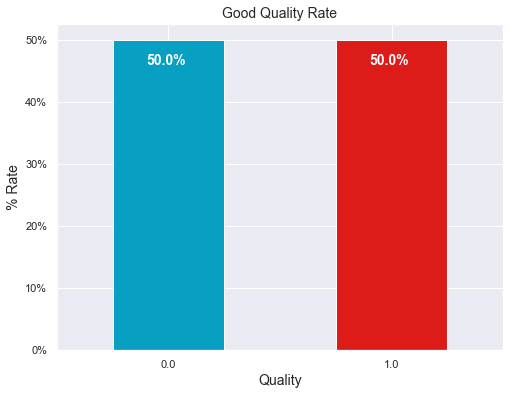

In [99]:
quality_rate(y['quality'])

<a name = "Splitting"></a>
## 7.Splitting the Data

#### Standardization 

In [100]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [101]:
columns =x.columns

In [102]:
x = sc.fit_transform(x)

In [103]:
x = pd.DataFrame(x,columns=columns)

In [104]:
x.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03
mean,1.266667e-14,-1.591658e-15,6.381597e-17,-1.959217e-16,1.504895e-15,1.445180e-16,-1.470552e-15,3.027321e-16,-1.084254e-16,6.419856e-15,1.962637e-15,-8.913943e-14
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-2.155854e+00,-5.952815e+00,-3.848201e+00,-2.758922e+00,-2.743158e+00,-6.108108e+00,-2.932104e+00,-2.204219e+00,-2.519881e+00,-4.200886e+00,-3.979695e+00,-3.428042e+00
25%,-1.020167e-01,-5.697732e-01,-6.985231e-01,-4.149546e-01,-8.048914e-01,-6.454711e-01,-6.724217e-01,-5.594407e-01,-8.336001e-01,-6.421636e-01,-6.862682e-01,-7.862722e-01
50%,6.136082e-01,-4.522883e-02,9.214362e-03,-7.970857e-04,-1.996030e-01,-6.539692e-02,9.416949e-02,1.000095e-01,-3.952048e-02,-7.951353e-03,9.880641e-03,1.434600e-01
75%,6.136082e-01,5.596883e-01,6.220113e-01,5.084546e-01,8.818354e-01,6.180120e-01,6.845105e-01,6.718514e-01,7.988505e-01,6.720900e-01,6.869388e-01,8.389988e-01
max,6.136082e-01,3.390908e+00,3.360868e+00,7.652584e+00,2.844734e+00,3.766646e+00,6.845517e+00,5.268150e+00,8.553959e+00,4.105964e+00,4.059522e+00,2.244585e+00


In [105]:
x.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.613608,0.049574,-0.169814,0.304650,2.004252,0.015428,0.922204,1.086161,2.253784,-1.641599,-0.495707,-2.127703
1,0.613608,-0.686013,0.093462,0.152847,-0.988285,0.225868,-0.973757,0.424701,0.097968,0.520286,-0.148737,-1.225751
2,0.613608,0.920185,-0.078055,0.602928,0.947940,0.274542,0.152588,-0.215030,0.467598,0.260153,-0.589434,-0.583993
3,0.613608,0.230288,-0.585758,-0.000797,1.171237,0.618012,1.013079,1.356613,0.631592,-0.214469,-0.997279,-0.786272
4,0.613608,-0.806495,0.250919,-1.302799,0.963721,0.015428,0.152588,0.495765,0.401303,-0.284374,-0.316925,-1.111234


In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify= y,random_state = 7)

<a name = "Model"></a>
## 8.Model training

#### Stochastic Gradient Decent Classifier

In [107]:
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

In [108]:
print(sgd.score(x_test,y_test)*100,"%")
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)*100),"%")

76.21527777777779 %
Accuracy: 76.21527777777779 %


In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.74      0.76       864
         1.0       0.75      0.78      0.77       864

    accuracy                           0.76      1728
   macro avg       0.76      0.76      0.76      1728
weighted avg       0.76      0.76      0.76      1728



#### Logistic Regression Classifier

In [110]:
Lr = LogisticRegression(max_iter=1000) #Logistic Regression Model 
Lr.fit(x_train,y_train)
y_pred= Lr.predict(x_test)

In [111]:
print(Lr.score(x_test,y_test)*100,"%")
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)*100),"%")

77.31481481481481 %
Accuracy: 77.31481481481481 %


In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76       864
         1.0       0.75      0.82      0.78       864

    accuracy                           0.77      1728
   macro avg       0.78      0.77      0.77      1728
weighted avg       0.78      0.77      0.77      1728



#### Decision Tree Classifier

In [113]:
dct = DecisionTreeClassifier()
dct.fit(x_train,y_train)
y_pred= dct.predict(x_test)

In [114]:
print(dct.score(x_test,y_test)*100,"%")
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)*100),"%")

83.62268518518519 %
Accuracy: 83.62268518518519 %


In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83       864
         1.0       0.83      0.85      0.84       864

    accuracy                           0.84      1728
   macro avg       0.84      0.84      0.84      1728
weighted avg       0.84      0.84      0.84      1728



#### Support Vector Classifier

In [116]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [117]:
print(svc.score(x_test,y_test)*100,"%")
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)*100),"%")

84.02777777777779 %
Accuracy: 84.02777777777779 %


In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83       864
         1.0       0.81      0.90      0.85       864

    accuracy                           0.84      1728
   macro avg       0.84      0.84      0.84      1728
weighted avg       0.84      0.84      0.84      1728



#### Random Forest Classifier

In [119]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
y_pred= rfc.predict(x_test)

In [120]:
print(rfc.score(x_test,y_test)*100,"%")
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)*100),"%")

89.81481481481481 %
Accuracy: 89.81481481481481 %


In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90       864
         1.0       0.88      0.92      0.90       864

    accuracy                           0.90      1728
   macro avg       0.90      0.90      0.90      1728
weighted avg       0.90      0.90      0.90      1728



#### XGBoost Classifier

In [122]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [123]:
print(xgb.score(x_test,y_test)*100,"%")
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)*100),"%")

90.74074074074075 %
Accuracy: 90.74074074074075 %


In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       864
         1.0       0.90      0.92      0.91       864

    accuracy                           0.91      1728
   macro avg       0.91      0.91      0.91      1728
weighted avg       0.91      0.91      0.91      1728



<a name = "Predictions"></a>
## 9.Test set predictions

#### Confusion Matrix

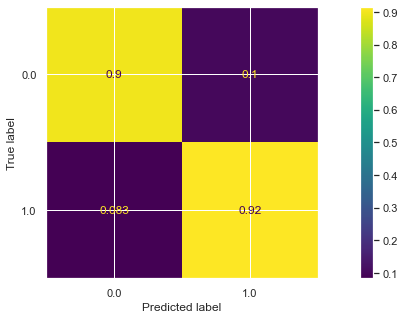

In [125]:
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
fig, ax = plt.subplots(figsize=(15,5))
disp.plot(ax=ax)
plt.show()

### Feature Importances

In [126]:
print(xgb.feature_importances_)

[0.21176971 0.04831431 0.08550452 0.05746926 0.05540021 0.04032176
 0.04837342 0.04028063 0.03935959 0.04905766 0.04985989 0.27428898]


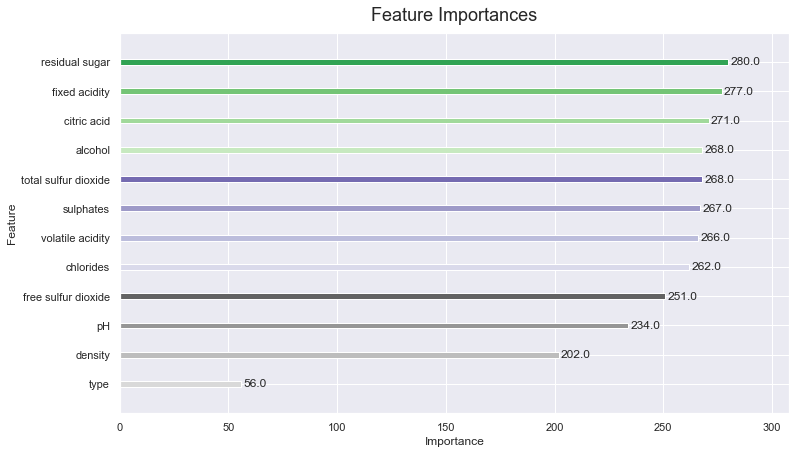

In [127]:
cmap = plt.cm.get_cmap('tab20c_r')
colors = [cmap(i) for i in range(x.shape[1])]
fig, ax = plt.subplots(figsize=(12, 7))
plot_importance(xgb, ax=ax, color=colors)
plt.title('Feature Importances', fontdict={'fontsize':18}, pad=12)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

let's drop the "type" column.

In [128]:
x = x[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify= y,random_state = 7)

## Grid Search CV

In [129]:
model_params  = {
        "SVC" : {
        "model":SVC(gamma="auto"),
        "params":{
            'C' : [1,10,20],
            'kernel':["rbf"]
        }
    },
    
#     "decision_tree":{
#         "model": DecisionTreeClassifier(),
#         "params":{
#             'criterion':["entropy","gini"],
#             "max_depth":[5,8,9]
#         }
#     },
    "Random_Forest":{
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10],
            "max_depth":[5,8,9]
        }
    },
        
#     'logistic_regression' : {
#         'model' : LogisticRegression(solver='liblinear',multi_class = 'auto'),
#         'params': {
#             "C" : [1,5,10]
#         }
#     },
    
    'XGBClassifier' : {
        'model': XGBClassifier(),
        'params':{
            'max_depth': [3, 5, 7],
            'learning_rate': [0.1, 0.2, 0.3],
            'n_estimators': [100, 200, 300],
#            'booster': ['gbtree', 'gblinear', 'dart'],
#             'reg_lambda': [0.1, 1.0, 10.0],
#             'reg_alpha': [0, 0.1, 1.0],
#             'scale_pos_weight': [1, 5, 10]
        }
    }
    
}

In [130]:
score=[]
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=8,return_train_score=False,n_jobs=-1)
    clf.fit(x,y)
    score.append({
        "Model" : model_name,
        "Best_Score": clf.best_score_,
        "Best_Params": clf.best_params_
    })
    

In [131]:
best = pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])
best=best.sort_values('Best_Score',ascending=False)
best.style.background_gradient(cmap='Greens')

,Model,Best_Score,Best_Params
2,XGBClassifier,0.842075,"{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}"
0,SVC,0.820405,"{'C': 20, 'kernel': 'rbf'}"
1,Random_Forest,0.796080,"{'max_depth': 9, 'n_estimators': 10}"


In [132]:
best_params = clf.best_params_
print(best_params)

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


In [133]:
xgb = XGBClassifier(learning_rate = 0.3, max_depth = 7,n_estimators = 300)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [134]:
print(xgb.score(x_test,y_test)*100,"%")
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)*100),"%")

91.26157407407408 %
Accuracy: 91.26157407407408 %


In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       864
         1.0       0.90      0.93      0.91       864

    accuracy                           0.91      1728
   macro avg       0.91      0.91      0.91      1728
weighted avg       0.91      0.91      0.91      1728



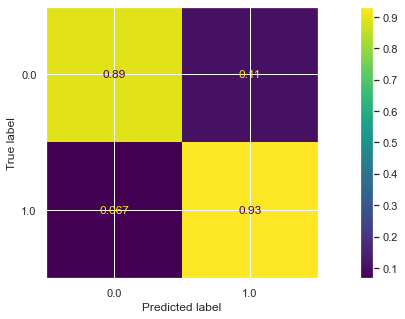

In [136]:
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
fig, ax = plt.subplots(figsize=(15,5))
disp.plot(ax=ax)
plt.show()

## Cross Validation

In [137]:
clf = XGBClassifier()
scores = cross_val_score(clf,x,y,cv=10,scoring="accuracy")

In [138]:
scores 

array([0.65625   , 0.66898148, 0.84375   , 0.93634259, 0.87152778,
       0.87847222, 0.87949015, 0.95133256, 0.9212051 , 0.87253766])

In [139]:
scores.mean()

0.8479889543367237

In [140]:
scores.std()

0.09785224113902032